<a href="https://colab.research.google.com/github/Alizito/Web_Scraping_RPP/blob/main/Web_Scraping_RPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<big> <big><big><big><big>WEB SCRAPING

El web scraping se refiere al proceso de extracción de contenidos y datos de sitios web mediante software. Por ejemplo, la mayoría de los servicios de comparación de precios utilizan web scrapers para leer la información de precios de varias tiendas online.

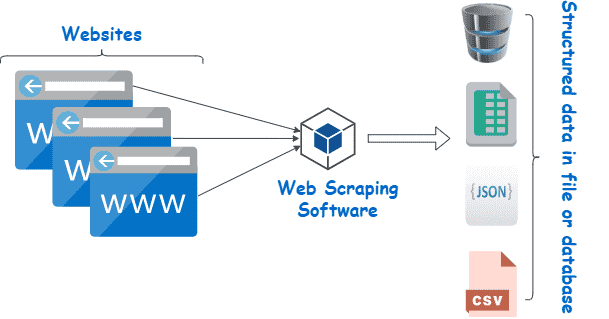

En esta ocacion realizaremos un web scraping de las noticias desde el 2018 hasta la actualidad de la pagina de "rpp noticias"

Primero importaremos todas las librerias nesesarias para extraer el html de la pagina rpp.pe

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import re

Creamos una lista para que almacene las fechas desde el 2018 hasta la fecha actual

In [ ]:
from datetime import datetime, timedelta

# Fecha de inicio
fecha_inicio = datetime(2018, 1, 1)

# Fecha de finalización (octubre de 2023)
fecha_fin = datetime(2023, 10, 4)

# Variable para almacenar la fecha actual
fecha_actual = fecha_inicio

# Lista para almacenar todas las fechas
fechas = []

# Bucle para generar todas las fechas hasta la fecha de finalización
while fecha_actual < fecha_fin:
    fecha_formateada = fecha_actual.strftime("%Y-%m-%d")
    fechas.append(fecha_formateada)
    fecha_actual += timedelta(days=1)

# Imprimir las fechas generadas
for fecha in fechas:
    print(fecha)


2018-01-01
2018-01-02
2018-01-03
2018-01-04
2018-01-05
2018-01-06
2018-01-07
2018-01-08
2018-01-09
2018-01-10
2018-01-11
2018-01-12
2018-01-13
2018-01-14
2018-01-15
2018-01-16
2018-01-17
2018-01-18
2018-01-19
2018-01-20
2018-01-21
2018-01-22
2018-01-23
2018-01-24
2018-01-25
2018-01-26
2018-01-27
2018-01-28
2018-01-29
2018-01-30
2018-01-31
2018-02-01
2018-02-02
2018-02-03
2018-02-04
2018-02-05
2018-02-06
2018-02-07
2018-02-08
2018-02-09
2018-02-10
2018-02-11
2018-02-12
2018-02-13
2018-02-14
2018-02-15
2018-02-16
2018-02-17
2018-02-18
2018-02-19
2018-02-20
2018-02-21
2018-02-22
2018-02-23
2018-02-24
2018-02-25
2018-02-26
2018-02-27
2018-02-28
2018-03-01
2018-03-02
2018-03-03
2018-03-04
2018-03-05
2018-03-06
2018-03-07
2018-03-08
2018-03-09
2018-03-10
2018-03-11
2018-03-12
2018-03-13
2018-03-14
2018-03-15
2018-03-16
2018-03-17
2018-03-18
2018-03-19
2018-03-20
2018-03-21
2018-03-22
2018-03-23
2018-03-24
2018-03-25
2018-03-26
2018-03-27
2018-03-28
2018-03-29
2018-03-30
2018-03-31
2018-04-01

Una lista donde guardaremos la informacion que extraeremos

In [ ]:
data=[]

Mediante un for iteraremos entre las fechas y las diferentes paginas de noticias por fechas

In [ ]:
for i in range(len(fechas)):
  url = "https://rpp.pe/archivo/"+fechas[i]+""  # URL de la página de RPP Últimas Noticias
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  noticias = soup.find_all('div', class_='news__data')  # Esto depende de la estructura de la página
  for noticia in noticias:
    tage = noticia.find('h3').text
    titulo = noticia.find('h2', class_='news__title').text
    hora= noticia.find('div', class_='news__info').text
    fecha=str(fechas[i])

    h2 = noticia.find('h2')
    link = h2.find('a')['href']

    data.append([tage,titulo,hora,fecha,link])

Convertimos los datos en un dataframe

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,0,1,2,3,4
0,\n\n Me...,\n\n ¿Q...,\n18:50 hs\n,2018-01-01,https://rpp.pe/mundo/medio-oriente/quien-es-ah...
1,\n\n Ac...,\n\n Jo...,\n18:30 hs\n,2018-01-01,https://rpp.pe/lima/accidentes/joven-de-28-ano...
2,\n\n De...,\n\n Ma...,\n18:28 hs\n,2018-01-01,https://rpp.pe/futbol/descentralizado/marathon...
3,\n\n Ca...,\n\n De...,\n18:21 hs\n,2018-01-01,https://rpp.pe/peru/cajamarca/despiste-y-vuelc...
4,\n\n Co...,\n\n Re...,\n18:15 hs\n,2018-01-01,https://rpp.pe/musica/conciertos/recuento-los-...
...,...,...,...,...,...
63035,\n\n De...,\n\n Po...,\n\n \t\t\t\t\tpor An...,2023-10-03,https://rpp.pe/futbol/descentralizado/liga1-de...
63036,\n\n Li...,\n\n Bo...,\n\n \t\t\t\t\tpor Sa...,2023-10-03,https://rpp.pe/lima/actualidad/bomberos-garant...
63037,\n\n Ce...,\n\n Ar...,\n\n \t\t\t\t\tpor Ha...,2023-10-03,https://rpp.pe/famosos/celebridades/arnold-sch...
63038,\n\n Ju...,\n\n Co...,\n\n \t\t\t\t\tpor Lu...,2023-10-03,https://rpp.pe/politica/judiciales/contraloria...


vemos que la data tiene caracteres incluidos como espacios o saltos de linea, estos debemos eliminarlos

In [ ]:
df=df.replace('\n','',regex=True).astype(str)

In [ ]:
def limpiar_hora(texto):
    # Utilizar una expresión regular para extraer la hora en formato HH:MM
    match = re.search(r'(\d{1,2}:\d{2})', texto)
    if match:
        return match.group(1)  # Devolver la hora encontrada
    else:
        return None  # En caso de no encontrar una hora, devolver None o el valor original

In [ ]:
df[2] = df[2].apply(limpiar_hora)

In [ ]:
def extraer_ultimas_palabras(url):
    partes = url.split('/')
    if len(partes) >= 3:
        penultima = partes[-3]
        ultima = partes[-2]
    else:
        penultima = None
        ultima = None
    return pd.Series([penultima, ultima])

In [ ]:
df[[5, 6]] = df[4].apply(extraer_ultimas_palabras)

In [ ]:
for columna in df.columns:
    # Verifica si la columna es de tipo string (str) o objeto (object)
    if df[1].dtype == 'O':
        # Utiliza el método strip() para eliminar espacios al principio y al final
        df[1] = df[1].str.strip()

In [ ]:
for columna in df.columns:
    # Verifica si la columna es de tipo string (str) o objeto (object)
    if df[0].dtype == 'O':
        # Utiliza el método strip() para eliminar espacios al principio y al final
        df[0] = df[0].str.strip()

se extrajeron 2 caracteristicas mas de la url y se limpio la data de el dataframe

In [ ]:
df

,0,1,2,3,4,5,6
0,Medio Oriente,"¿Quién es Ahed Tamimi, ícono de la lucha contr...",18:50,2018-01-01,https://rpp.pe/mundo/medio-oriente/quien-es-ah...,mundo,medio-oriente
1,Accidentes,Joven de 28 años fue encontrada sin vida en un...,18:30,2018-01-01,https://rpp.pe/lima/accidentes/joven-de-28-ano...,lima,accidentes
2,Descentralizado,Marathon descarta tener un arreglo para vestir...,18:28,2018-01-01,https://rpp.pe/futbol/descentralizado/marathon...,futbol,descentralizado
3,Cajamarca,Despiste y vuelco de camioneta deja un muerto ...,18:21,2018-01-01,https://rpp.pe/peru/cajamarca/despiste-y-vuelc...,peru,cajamarca
4,Conciertos,Recuento: Los conciertos que nos hicieron vibr...,18:15,2018-01-01,https://rpp.pe/musica/conciertos/recuento-los-...,musica,conciertos
...,...,...,...,...,...,...,...
63035,Descentralizado,Por la fecha 17: Deportivo Municipal vs. Cienc...,17:47,2023-10-03,https://rpp.pe/futbol/descentralizado/liga1-de...,futbol,descentralizado
63036,Lima,Bomberos garantizaron atención de emergencias ...,17:42,2023-10-03,https://rpp.pe/lima/actualidad/bomberos-garant...,lima,actualidad
63037,Celebridades,"Arnold Schwarzenegger usa espada de 'Conan, el...",17:39,2023-10-03,https://rpp.pe/famosos/celebridades/arnold-sch...,famosos,celebridades
63038,Judiciales,"Contraloría detectó ""indicio de irregularidad""...",17:25,2023-10-03,https://rpp.pe/politica/judiciales/contraloria...,politica,judiciales


se le da un titulo y se exporta como csv

In [ ]:
df.columns = ['Categoria', 'Titulo', 'Hora', 'Fecha', 'URL', 'Caracteristica 1', 'Caracteristica 2']


In [ ]:
df.to_csv('archivo.csv', encoding='UTF-8', index=False)